# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from:https://www.kaggle.com/ealaxi/paysim1 (link from 29/8/21). Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fraud = pd.read_csv('../data/PS_20174392719_1491204439457_log.csv')
fraud = fraud.sample(n=100000)

In [3]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2102715,182,PAYMENT,4584.83,C1865803372,76094.04,71509.21,M502241268,0.00,0.00,0,0
4214739,305,CASH_IN,518062.68,C136132876,61942.00,580004.68,C707792591,424643.85,0.00,0,0
2760962,213,TRANSFER,189642.92,C1018293332,11688.55,0.00,C1005983919,591644.03,781286.95,0,0
5316290,374,CASH_OUT,30299.48,C1145478307,7938.80,0.00,C571935754,5710437.40,5740736.88,0,0
2526622,205,CASH_OUT,18056.67,C2090210862,1213.00,0.00,C1908166619,10306070.67,10324127.35,0,0


In [4]:
fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,244.049140,1.799450e+05,8.340168e+05,8.548054e+05,1.099514e+06,1.226147e+06,0.001420,0.0
std,142.165922,6.248638e+05,2.877330e+06,2.912835e+06,3.357614e+06,3.661483e+06,0.037656,0.0
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,156.000000,1.329792e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,241.000000,7.361540e+04,1.474440e+04,0.000000e+00,1.303814e+05,2.090855e+05,0.000000,0.0
75%,334.000000,2.072194e+05,1.083443e+05,1.439088e+05,9.381988e+05,1.101697e+06,0.000000,0.0
max,741.000000,3.887401e+07,3.731626e+07,3.341446e+07,2.192448e+08,2.339099e+08,1.000000,0.0


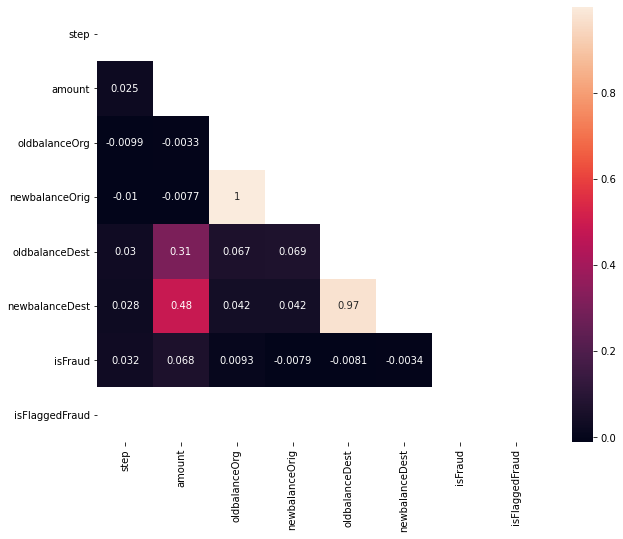

In [6]:

#creates a correlation matrix 
corr_matrix = fraud.corr()

# creating mask
mask = np.triu(np.ones_like(fraud.corr()))

#defining the size/dimensions of the plot
plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix,annot=True,mask=mask)

#display plot
plt.show()

In [7]:
#for the data cleaning since the two pairs newbalanceDest-oldbalanceDest and newbalanceOrig-oldbalanceOrig are highly correlated
#i can get rid of one in each pair, i choose to drop oldbalanceDest and oldbalanceOrig

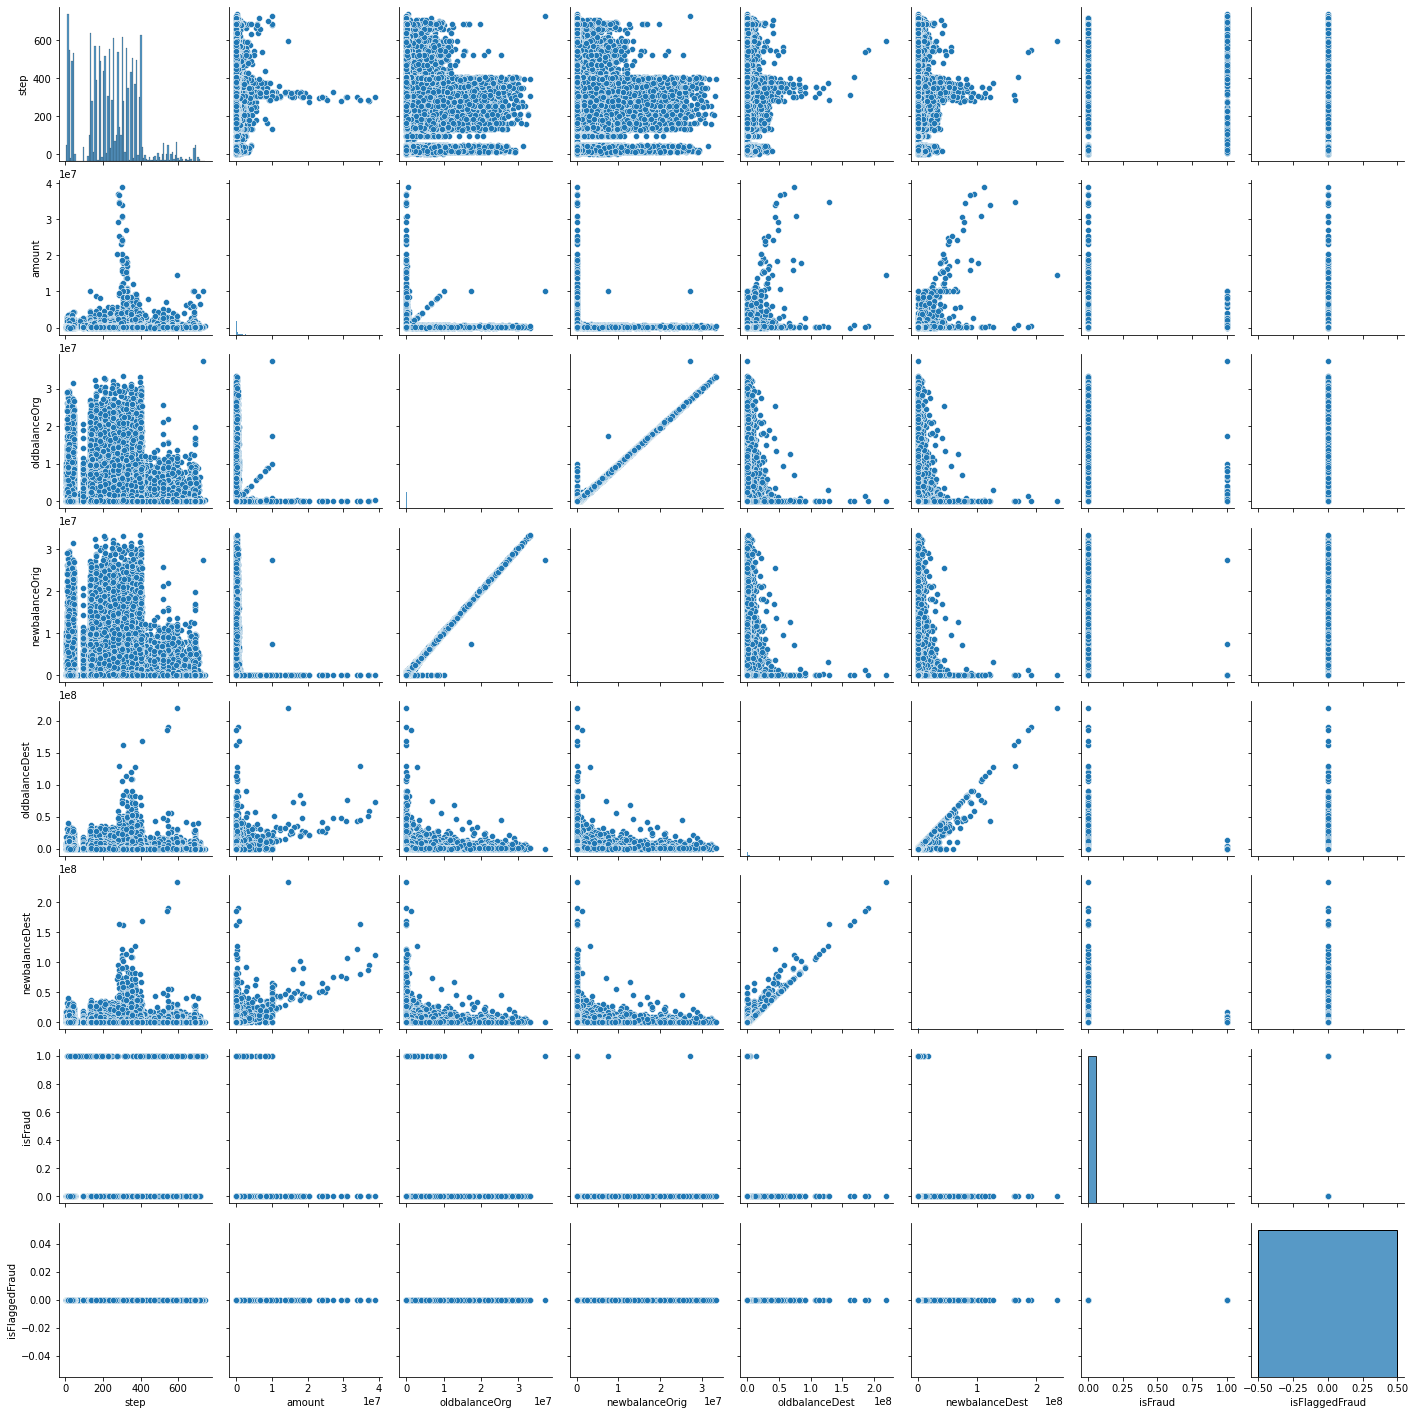

In [8]:
#plot a pairwise relationships in a dataset
sns.pairplot(data= fraud)

#display plot
plt.show()

In [9]:
#check the unique values of type

fraud['type'].value_counts()

CASH_OUT    35094
PAYMENT     34028
CASH_IN     21898
TRANSFER     8325
DEBIT         655
Name: type, dtype: int64

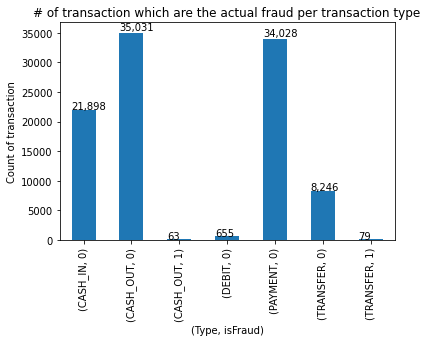

In [10]:
ax = fraud.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [11]:
#after checking the type of the features there are some of type object that can be dropped, i'm going to keep the column
#type because there is a important relation between the type of transaction and if is fraudulent or not like we can see
# in the plot above

### What is the distribution of the outcome? 

0    99858
1      142
Name: isFraud, dtype: int64


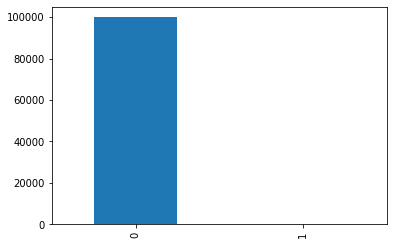

In [12]:
# Your response here


count_classes = pd.value_counts(fraud['isFraud']) #or count_classes = fraud['isFraud'].value_counts()

count_classes.plot(kind = 'bar')

#print the count of unique values for the column 'isFraud'
print(pd.value_counts(fraud['isFraud']))

#display the plot
plt.show()

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [13]:
# Your code here




#the columns that are categorical are of the type object
#shows only the name of the columns of the type object
categ_col = (fraud.select_dtypes(include=['object'])).columns.tolist()
categ_col

['type', 'nameOrig', 'nameDest']

In [14]:
#for cleaning i don't need the columns that are object but i'm goint to keep the type that i'm goin to convert to ordinal
fraud = fraud.drop(columns=['nameOrig','nameDest'])

# with one-hot encoding using the function get_dummies
fraud = pd.get_dummies(data=fraud,columns=['type'])

In [15]:
#for the data cleaning since the two pairs newbalanceDest-oldbalanceDest and newbalanceOrig-oldbalanceOrig are highly correlated
#i can get rid of one in each pair, i choose to drop oldbalanceDest and oldbalanceOrig
fraud = fraud.drop(columns=['oldbalanceDest', 'oldbalanceOrg'])

In [16]:
#check that all the types are right
fraud.dtypes

step                int64
amount            float64
newbalanceOrig    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type_CASH_IN        uint8
type_CASH_OUT       uint8
type_DEBIT          uint8
type_PAYMENT        uint8
type_TRANSFER       uint8
dtype: object

### Run a logisitc regression classifier and evaluate its accuracy.

In [17]:
from sklearn.model_selection import train_test_split

# Your code here:

#Spliting the target and the features
y = fraud['isFraud']
X = fraud.drop('isFraud',axis=1)

#splitting the data to train and test, selecting 20% of the data for testing and 80% for training
#random state equal to 42 because is the Answer to the Ultimate Question of Life (he Hitchhiker's Guide to the Galaxy hehe)
#random state equal to 42 or other number just defines that each time we run it will give the same output
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state =42)

In [18]:
# Your code here
from sklearn.linear_model import LogisticRegression

model_LogReg = LogisticRegression() 

#fit the LogisticRegression  model to our training data
model_LogReg = model_LogReg.fit(X_train,y_train) 

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = model_LogReg.predict(X_test)

print('The confusion matrix  of the model is:\n',confusion_matrix(y_test,y_pred))
print('The accuracy score of the model is',accuracy_score(y_test,y_pred))

The confusion matrix  of the model is:
 [[19949    27]
 [   23     1]]
The accuracy score of the model is 0.9975


In [20]:
#test if there is overfiting is the algorithm is memorizing the training data whet will be a problem because if we introduce
#new data it will not predict well

# the natural thing to do is to perform an evaluation of how well our model behaves with test data

# once the model is trained, i can call the score method, to compare results of test predictions with actual values -> returns the accuracy
print("test data accuracy was ",model_LogReg.score(X_test,y_test))

# you should always also see the accuracy of the training
print("train data accuracy was ", model_LogReg.score(X_train, y_train))


test data accuracy was  0.9975
train data accuracy was  0.997875


### Now pick a model of your choice and evaluate its accuracy.

In [34]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier as KC

#initialize the model -> set the hyperparameters
model_KC = KC(n_neighbors =4) #first i had 3 and i changed to 4 because of the plot in the end N_neighbors VS accuracy 
#and it reduced even more the difference between the train and test accuracy!!!!

#fit the KNeighborsClassifier  model to our training data
model_KC = model_KC.fit(X_train,y_train)

In [35]:
y_predict_KC = model_KC.predict(X_test)

print('The confusion matrix  of the model is:\n',confusion_matrix(y_test,y_predict_KC ))
print('The accuracy score of the model is',accuracy_score(y_test,y_predict_KC ))

The confusion matrix  of the model is:
 [[19974     2]
 [   19     5]]
The accuracy score of the model is 0.99895


In [36]:
#test if there is overfiting is the algorithm is memorizing the training data whet will be a problem because if we introduce
#new data it will not predict well

# the natural thing to do is to perform an evaluation of how well our model behaves with test data

# once the model is trained, i can call the score method, to compare results of test predictions with actual values -> returns the accuracy
print("test data accuracy was ",model_KC.score(X_test,y_test))

# you should always also see the accuracy of the training
print("train data accuracy was ", model_KC.score(X_train, y_train))


test data accuracy was  0.99895
train data accuracy was  0.99895


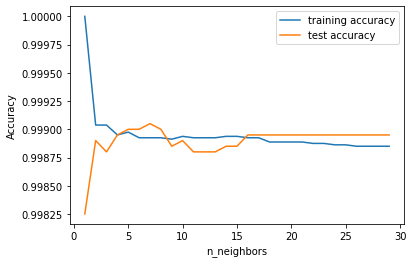

In [33]:
# These are actually quite good results, we don't seem to be overfitting
# let's see the test-training tradeoff as we force KNN to overfit
import matplotlib.pyplot as plt

# hyerparameter tuning
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 30)
for n_neighbors in neighbors_settings:
  # build the model
  clf = KC(n_neighbors=n_neighbors)
  #training the model
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show() 
# these types of charts are very important!! how does the test/training accuracy vary with a change in a hyperparameter

### Which model worked better and how do you know?

In [22]:
# Your response here
#The model that worked better was the  KNeighborsClassifier compared with the LogisticRegression
#based on the confusion matrix there is less false negatives, that means the model won't let pass so many fraudulent transactions
#the accuracy is a little bit higher and the overfit practically don't exist that means the model will work well on new data,
# to predict if a transaction is fraudulent

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.